## **ML Assignment 1**

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like $R^2$, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [ ]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar

In [ ]:
# Fetch the dataset and explore
df = pd.read_csv("uber.csv")
df.info()

print("\ndf.shape =", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB

df.shape = (200000, 9)


In [ ]:
# 1. Preprocess the dataset

# Handle missing values by removing rows with NaN values
df.dropna(inplace=True)

df.info()

print(df.isnull().sum())

# Remove unnecessary columns (somehow already removed)
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
# Convert 'pickup_datetime' column to datetime format
df['pickup_datetime'] = pd.to_datetime(df["pickup_datetime"])
print(df.head())
print("\n")
print(df.describe())

   fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5  


         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  199999.000000     199999.000000    199999.000000      199999.000000   
mean       11.35989

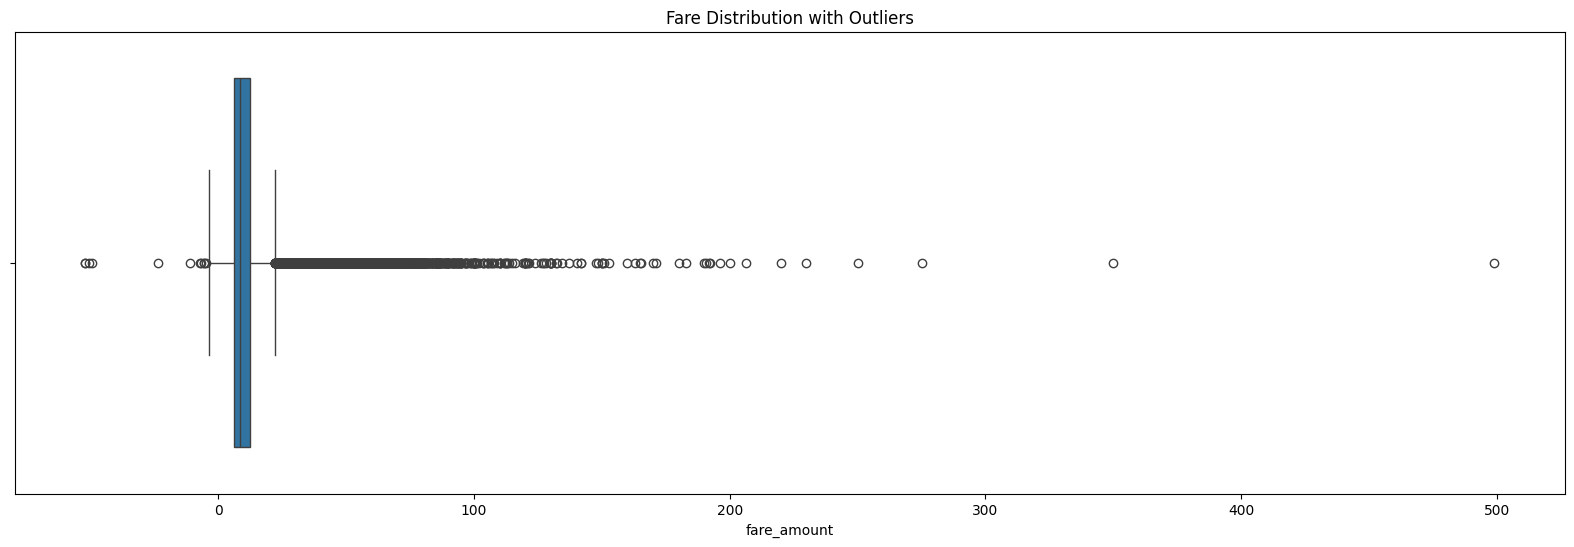

In [ ]:
# 2. Identify and remove outliers
# Visualize the outliers using boxplot for 'fare_amount'

plt.figure(figsize=(20, 6))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Distribution with Outliers")
plt.show()

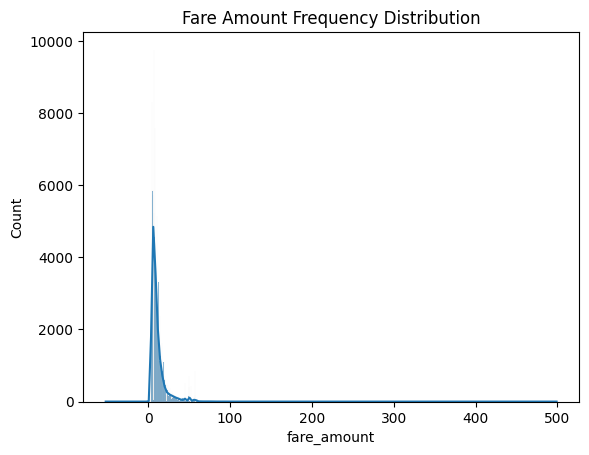

In [ ]:
# Histogram Plot for 'fare_amount'
sns.histplot(df['fare_amount'], kde=True)
plt.title('Fare Amount Frequency Distribution')
plt.show()

In [ ]:
# Function to find outliers

def findOutliers(dfColumn):
    q1 = dfColumn.quantile(0.25)
    q3 = dfColumn.quantile(0.75)
    iqr = q3 - q1
    outliers = dfColumn[(dfColumn < (q1 - 1.5 * iqr)) | (dfColumn > (q3 + 1.5 * iqr))]
    return outliers

In [ ]:
# Identify outliers in the 'fare_amount' attribute
outliers = findOutliers(df['fare_amount'])
print("No. of outliers: ", len(outliers))
print("\nMax outlier value: ", outliers.max())
print("\nMin outlier value: ", outliers.min())

No. of outliers:  17166

Max outlier value:  499.0

Min outlier value:  -52.0


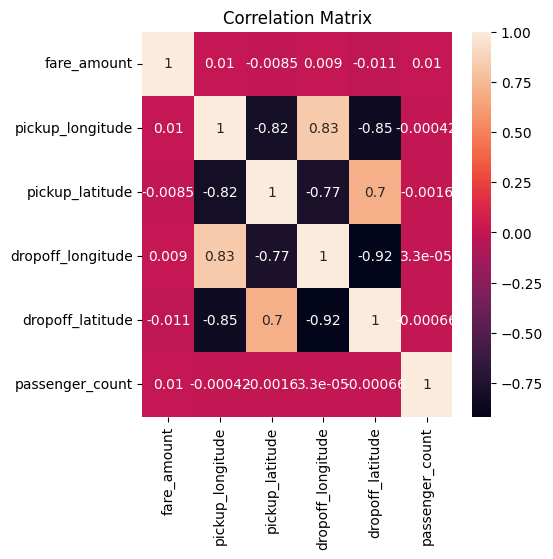

In [ ]:
# Correlation Matrix
# Remove 'pickup_datetime'
corrData = df.drop(['pickup_datetime'], axis=1) # no 'inplace=True'
plt.figure(figsize=(10, 6)) # For canvas
sns.heatmap(corrData.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Split 'pickup_datetime' into individual components for analysis
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

# After splitting, remove the 'pickup_datetime' attribute
df.drop(['pickup_datetime'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,weekday,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,3,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,4,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,0,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,4,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,3,8,2014


In [ ]:
# Implement Linear Regression and Random Forest Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [ ]:
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']

# Split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
y

,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
4,16.0
...,...
199995,3.0
199996,7.5
199997,30.9
199998,14.5


In [ ]:
def returnRounded(value):
    return (math.floor(value * 1000)) / 1000

In [ ]:
# Train the model on data & predict using test data
linear = LinearRegression()
linear.fit(x_train, y_train)
linearPredict = linear.predict(x_test)

# Calculate the errors and r^2 score
linearRMSE = np.sqrt(mean_squared_error(y_test, linearPredict)) # Square root of MSE
linearR2 = r2_score(y_test, linearPredict)
linearMAE = mean_absolute_error(y_test, linearPredict)

print("Root Mean Squared Error:", returnRounded(linearRMSE))
print("R^2 Score:", returnRounded(linearR2))
print("Mean Absolute Error:", returnRounded(linearMAE))

Root Mean Squared Error: 9.807
R^2 Score: 0.016
Mean Absolute Error: 5.967


In [ ]:
# Train model on Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=101)
forest.fit(x_train, y_train)
forestPredict = forest.predict(x_test)

# Calculate the errors and R^2 Score
forestRMSE = np.sqrt(mean_squared_error(y_test, forestPredict)) # Square root of MSE
forestR2 = r2_score(y_test, forestPredict)
forestMAE = mean_absolute_error(y_test, forestPredict)

print("Root Mean Squared Error:", returnRounded(forestRMSE))
print("R^2 Score:", returnRounded(forestR2))
print("Mean Absolute Error:", returnRounded(forestMAE))

Root Mean Squared Error: 4.777
R^2 Score: 0.766
Mean Absolute Error: 1.975


In [ ]:
# Comparison of model performance
print("\nModel Comparison:\n")
print("Linear Regression\nRMSE:", returnRounded(linearRMSE), "\tR^2:", returnRounded(linearR2), "\tMAE:", returnRounded(linearMAE))
print("Random Forest Regression\nRMSE:", returnRounded(forestRMSE), "\tR^2:", returnRounded(forestR2), "\tMAE:", returnRounded(forestMAE))


Model Comparison:

Linear Regression
RMSE: 9.807 	R^2: 0.016 	MAE: 5.967
Random Forest Regression
RMSE: 4.777 	R^2: 0.766 	MAE: 1.975
